 ## Pruebas con MCPS

--- Prueba de MCPS con cálculo de ECRPS ---

Usando 180 puntos para predecir. Valor real: 0.1376

Ejecutando mcps_model.fit_predict()...

--- Resultados de la Evaluación ---
La distribución empírica tiene 7 resultados únicos.
ECRPS del modelo MCPS vs. Teórica: 0.3374


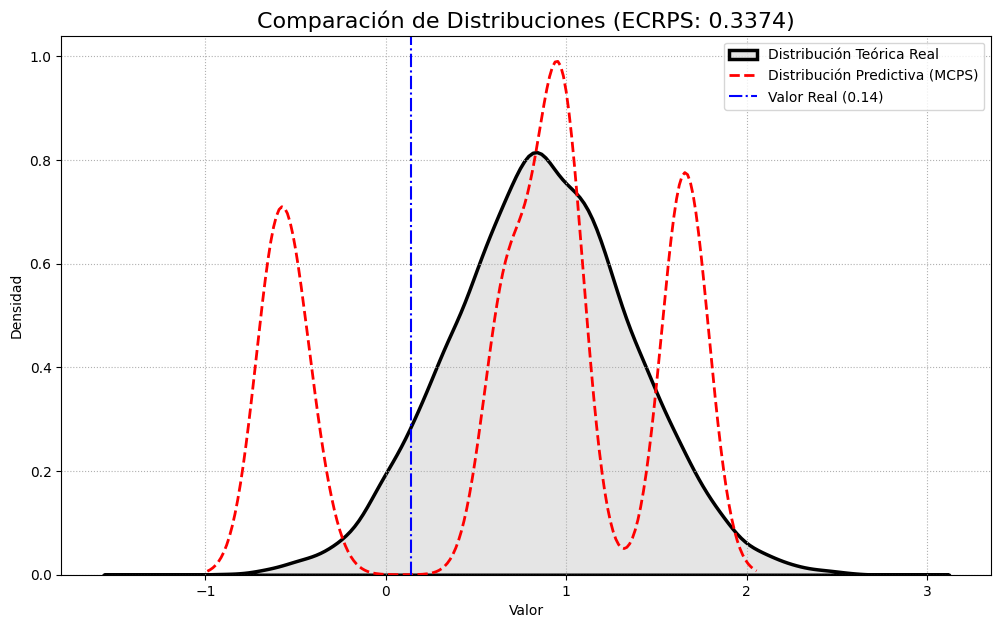

In [1]:
from pipeline import ARMASimulation, MondrianCPSModel, ecrps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == "__main__":
    
    print("--- Prueba de MCPS con cálculo de ECRPS ---")
    
    SEED = 42
    rng_eval = np.random.default_rng(SEED) # Generador para la evaluación
    simulator = ARMASimulation(phi=[0.9], sigma=0.5, seed=SEED)
    full_series, full_errors = simulator.simulate(n=200)
    
    history_len = 180
    history_series, history_errors = full_series[:history_len], full_errors[:history_len]
    true_future_value = full_series[history_len]
    
    print(f"\nUsando {history_len} puntos para predecir. Valor real: {true_future_value:.4f}")
    
    mcps_model = MondrianCPSModel(n_lags=12, n_bins=8, test_size=0.3, random_state=SEED, verbose=False)
    
    print("\nEjecutando mcps_model.fit_predict()...")
    predictive_distribution = mcps_model.fit_predict(history_series)
    
    # --- CÁLCULO DE MÉTRICAS (NUEVA SECCIÓN) ---
    
    # 1. Extraer valores y probabilidades de la salida del modelo
    values = [d['value'] for d in predictive_distribution]
    probs = [d['probability'] for d in predictive_distribution]
    
    # 2. Generar muestras a partir de la distribución empírica (PARA EVALUACIÓN)
    n_samples_for_eval = 10000
    samples_from_model = rng_eval.choice(
        values, size=n_samples_for_eval, p=probs, replace=True
    )
    
    # 3. Obtener las muestras de la distribución teórica real
    theoretical_samples = simulator.get_true_next_step_samples(history_series, history_errors, n_samples=n_samples_for_eval)
    
    # 4. Calcular el ECRPS
    score_ecrps = ecrps(samples_from_model, theoretical_samples)
    
    print("\n--- Resultados de la Evaluación ---")
    print(f"La distribución empírica tiene {len(values)} resultados únicos.")
    print(f"ECRPS del modelo MCPS vs. Teórica: {score_ecrps:.4f}")
    
    # --- VISUALIZACIÓN ---
    expected_value = np.sum(np.array(values) * np.array(probs))
    
    plt.figure(figsize=(12, 7))
    sns.kdeplot(theoretical_samples, label='Distribución Teórica Real', color='black', lw=2.5, fill=True, alpha=0.1)
    sns.kdeplot(samples_from_model, label='Distribución Predictiva (MCPS)', color='red', linestyle='--', lw=2)
    plt.axvline(true_future_value, color='blue', linestyle='-.', label=f'Valor Real ({true_future_value:.2f})')
    
    # Añadir el ECRPS al título para un informe completo
    plt.title(f"Comparación de Distribuciones (ECRPS: {score_ecrps:.4f})", fontsize=16)
    
    plt.xlabel("Valor"); plt.ylabel("Densidad"); plt.legend(); plt.grid(True, ls=':')
    plt.show()

# Aplicación del codigo

## Prueba con 2 Escenarios

INICIANDO PRUEBA RÁPIDA CON 2 ESCENARIOS
Ejecutando 2 escenarios en 2 lotes

LOTE 1/2 (Escenarios 1-1)
    Sublote 1/1


      Escenarios: 100%|██████████| 1/1 [05:08<00:00, 308.14s/it]


  Limpiando memoria del lote...

LOTE 2/2 (Escenarios 2-2)
    Sublote 1/1


      Escenarios: 100%|██████████| 1/1 [06:29<00:00, 389.98s/it]


  Limpiando memoria del lote...
✅ 12 resultados guardados en 'resultados_finales.xlsx'


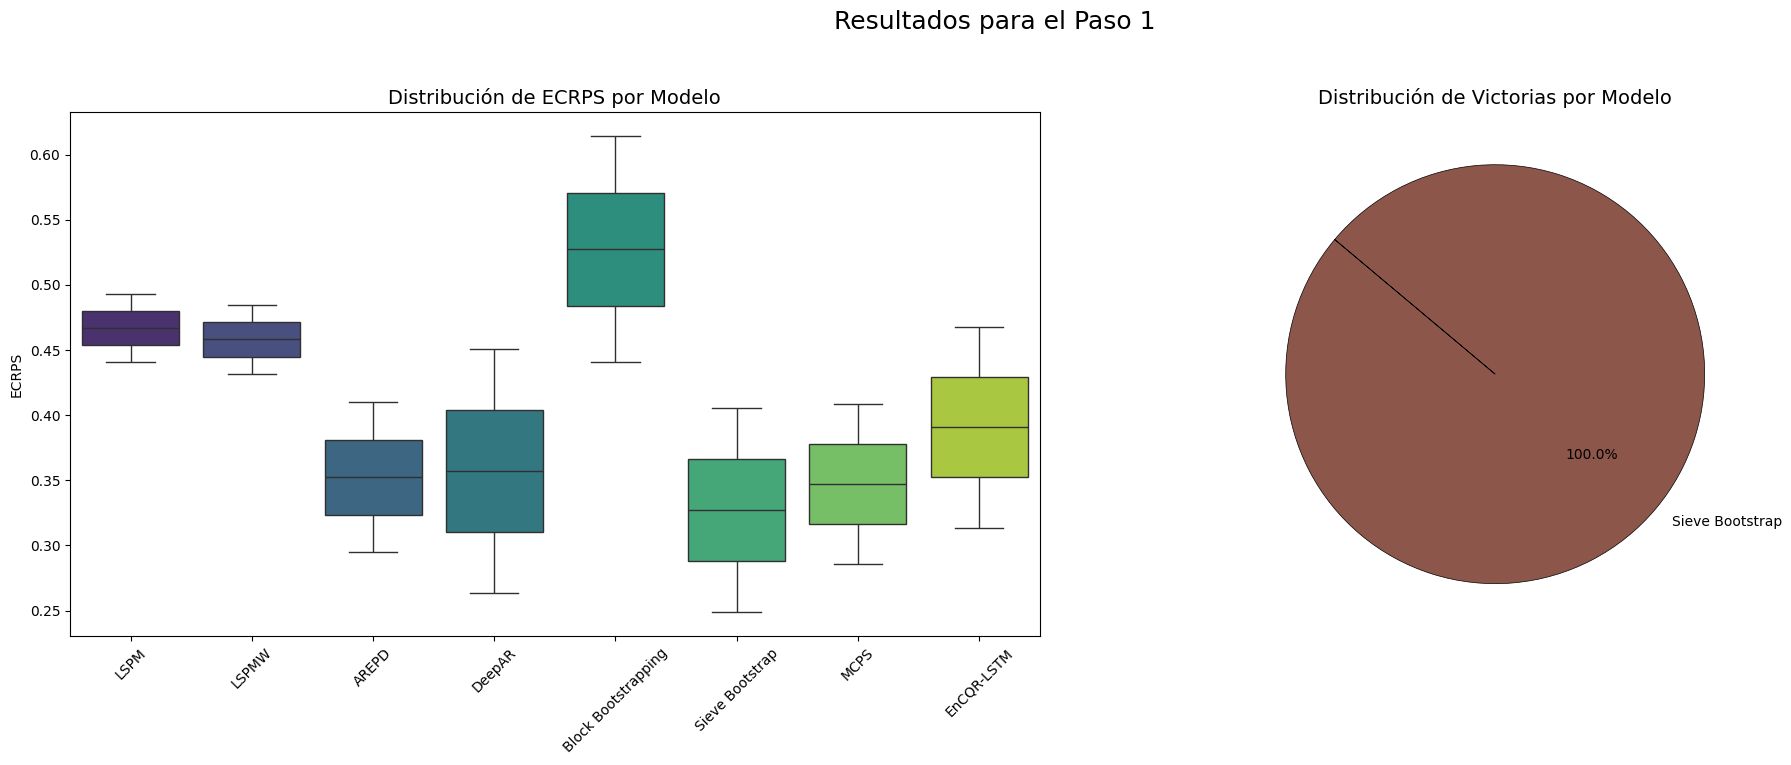

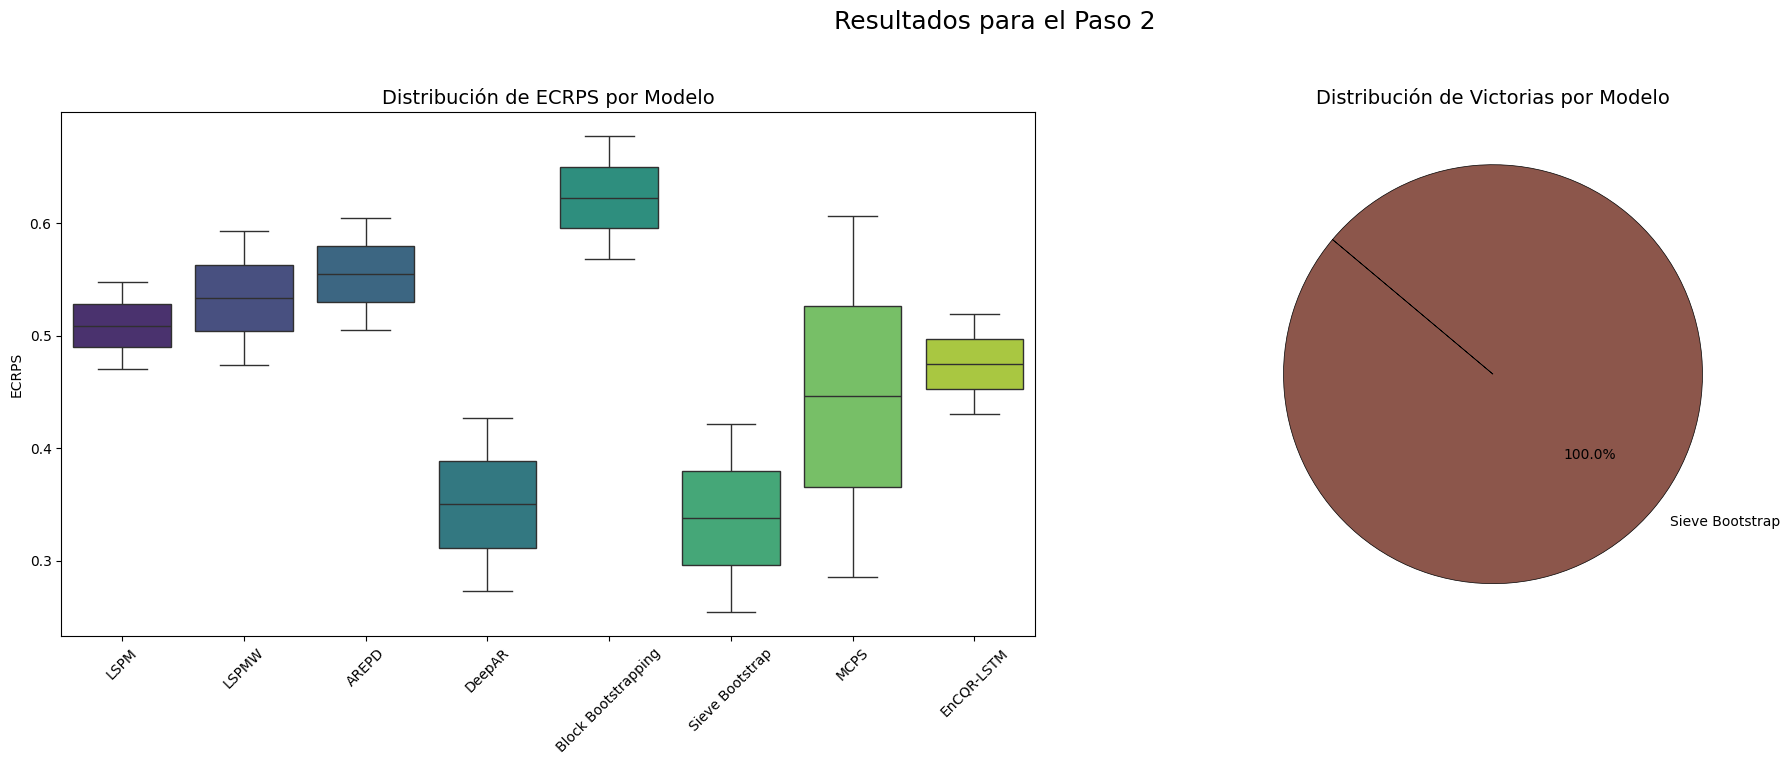

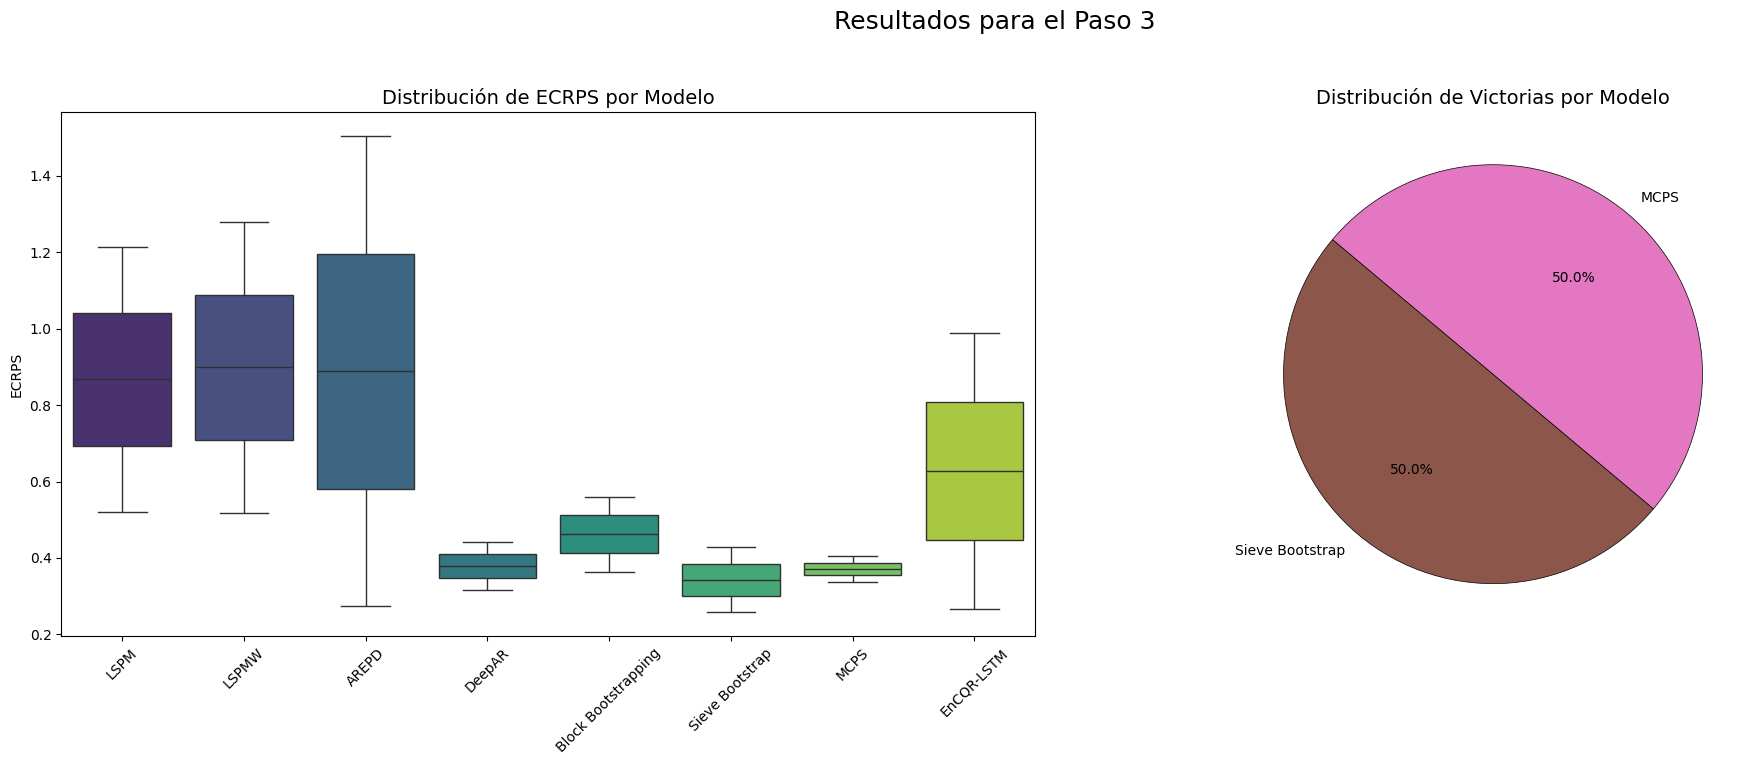

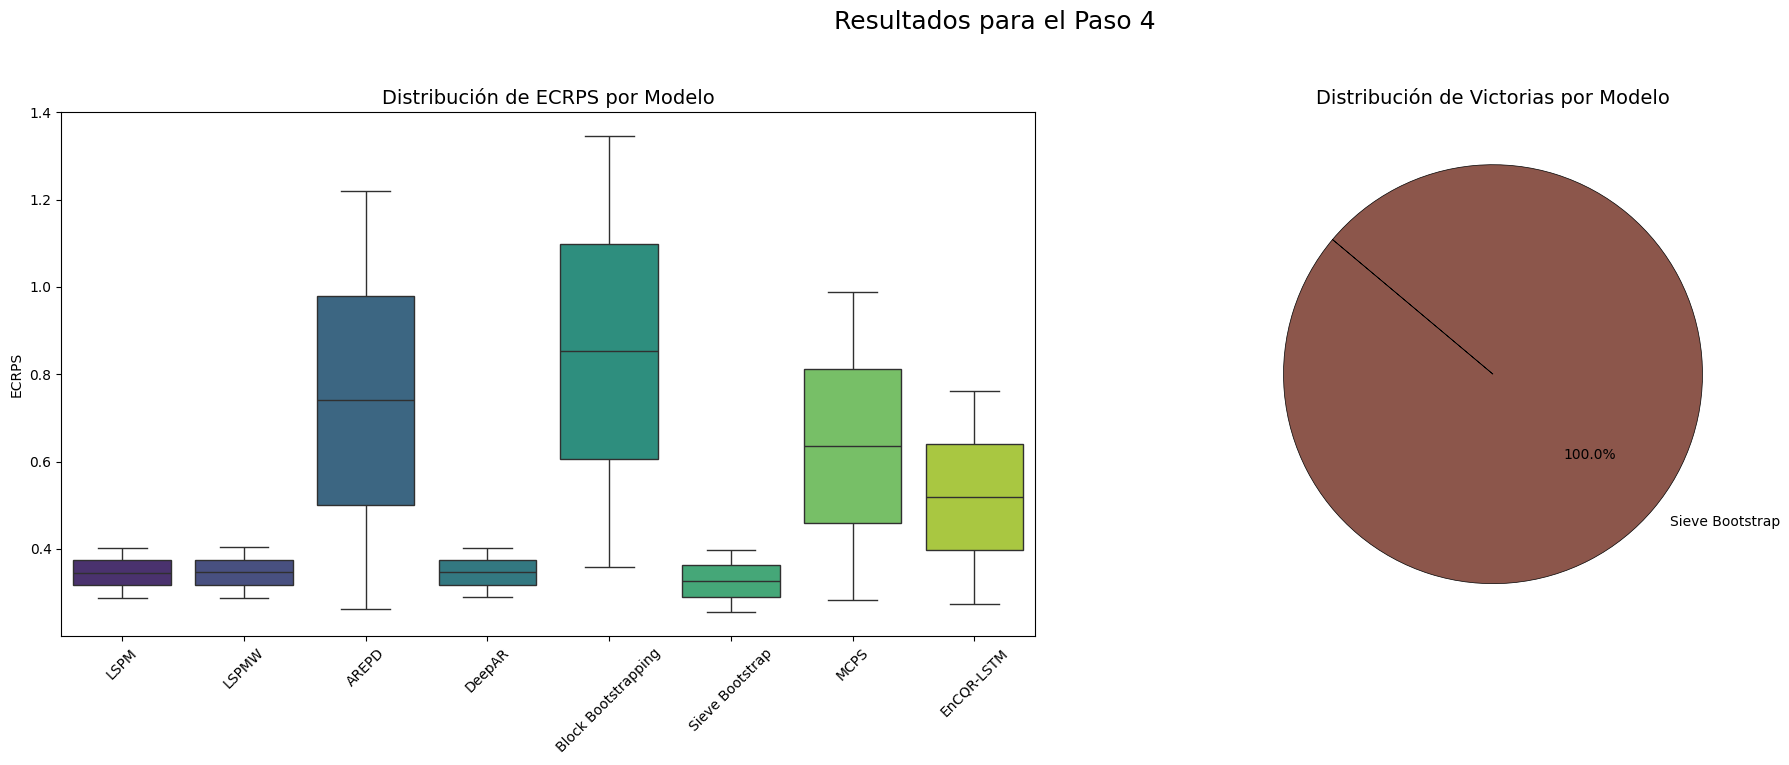

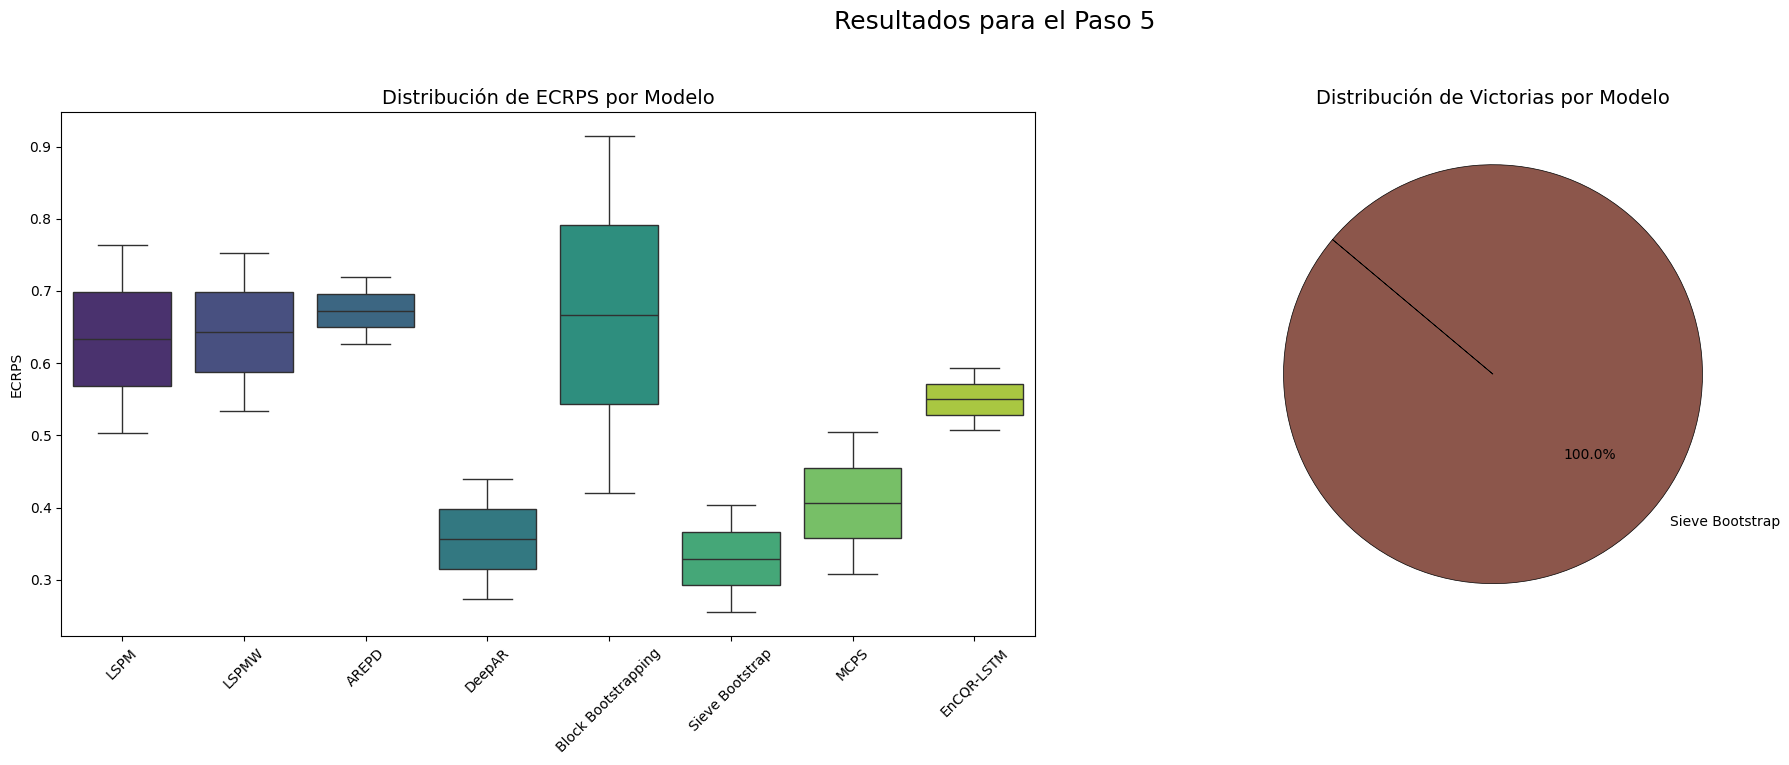

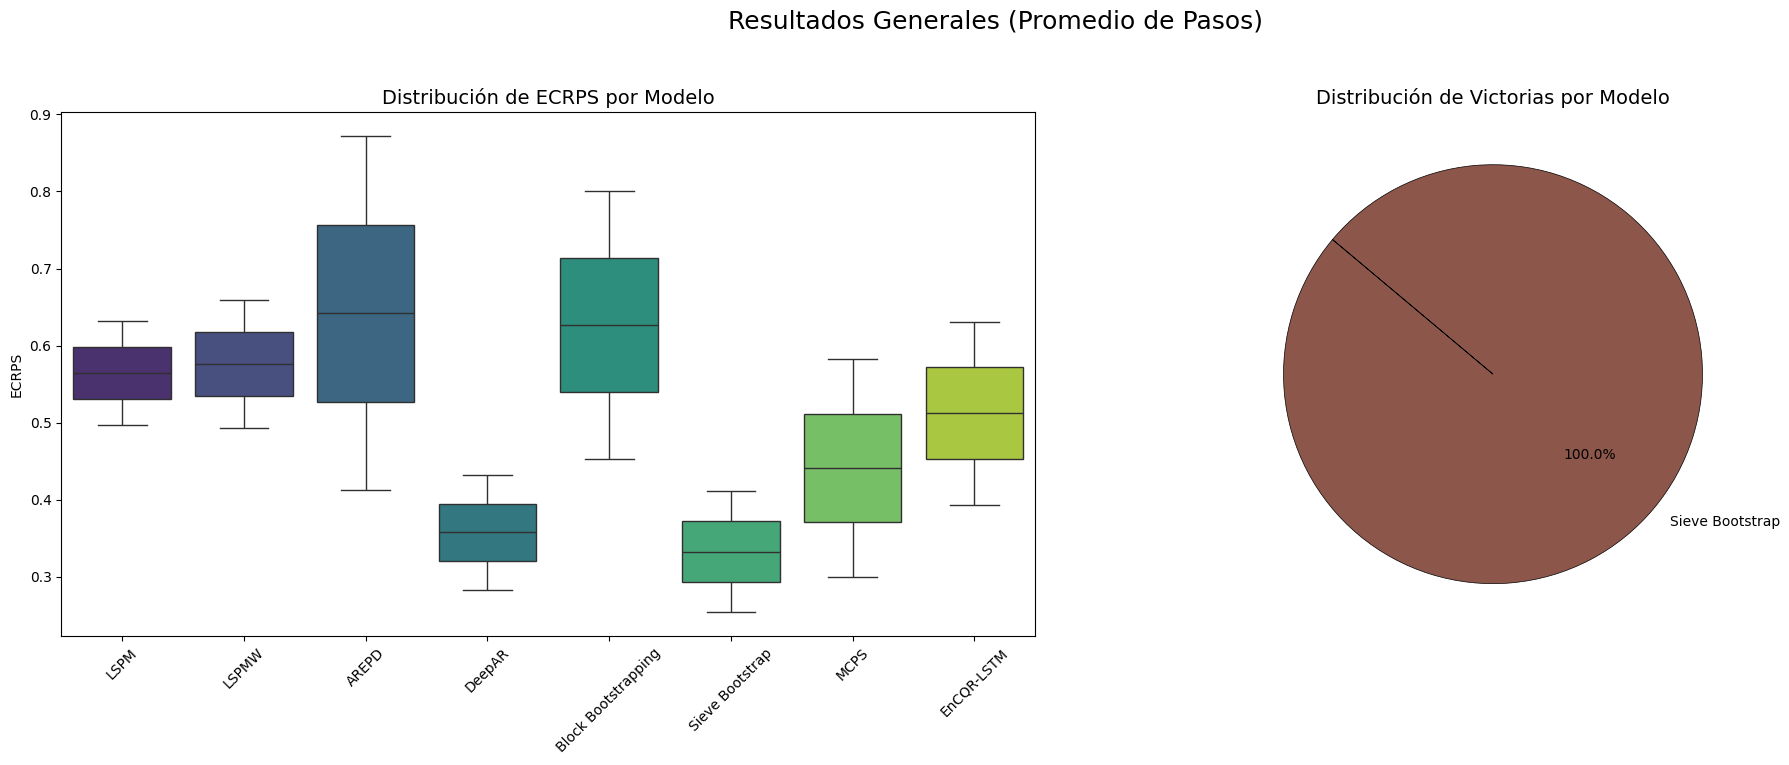



PRUEBA RÁPIDA FINALIZADA. Revisa el Excel 'resultados_prueba_2_escenarios.xlsx' y los gráficos generados.


In [2]:
from pipeline import ScenarioRunnerMejorado
import warnings

warnings.filterwarnings("ignore")

# ===================================================================
# SECCIÓN PRINCIPAL: Cómo ejecutar el código
# ===================================================================
if __name__ == '__main__':

    # -------------------------------------------------------------------
    # Opción 1: Prueba Rápida con los 2 primeros escenarios
    # -------------------------------------------------------------------
    print("="*80)
    print("INICIANDO PRUEBA RÁPIDA CON 2 ESCENARIOS")
    print("="*80)
    
# Ejecutar con lotes de 40 escenarios
    runner = ScenarioRunnerMejorado(seed=420)
    runner.run(n_scenarios=2, batch_size=1)
    
    print("\n\nPRUEBA RÁPIDA FINALIZADA. Revisa el Excel 'resultados_prueba_2_escenarios.xlsx' y los gráficos generados.")
    print("="*80)


    # -------------------------------------------------------------------
    # Opción 2: Ejecución Completa con 120 escenarios
    # -------------------------------------------------------------------
    # DESCOMENTA LAS SIGUIENTES LÍNEAS PARA LA EJECUCIÓN COMPLETA
    # -------------------------------------------------------------------
    
    # print("\n"*3)
    # print("="*80)
    # print("INICIANDO EJECUCIÓN COMPLETA CON 120 ESCENARIOS")
    # print("="*80)

    # runner_completo = ScenarioRunnerAdaptado(seed=420)
    # runner_completo.run(n_scenarios=120)
    
    # runner_completo.save_results_to_excel("resultados_completos_120_escenarios.xlsx")
    # runner_completo.plot_results()

    # print("\n\nEJECUCIÓN COMPLETA FINALIZADA. Revisa el Excel 'resultados_completos_120_escenarios.xlsx' y los gráficos.")
    # print("="*80)

## Prueba con los 120 Escenarios

In [ ]:
from pipeline import ScenarioRunnerMejorado

# Configuración óptima para 120 escenarios:
runner = ScenarioRunnerMejorado(seed=420)
runner.run(
    n_scenarios=120,
    excel_filename="resultados_finales.xlsx",
    batch_size=15,        # Lotes más pequeños
    restart_every=5       # Reiniciar pool cada 5 escenarios
)

print("\n✅ Simulación completa con 120 escenarios finalizada.")

Ejecutando 120 escenarios en 8 lotes

LOTE 1/8 (Escenarios 1-15)
    Sublote 1/3


      Escenarios:   0%|          | 0/5 [00:00<?, ?it/s]

### Analisis de los ECRPS

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import friedmanchisquare, wilcoxon
from statsmodels.stats.multitest import multipletests
from itertools import combinations
import networkx as nx

def _crear_y_guardar_boxplot(df: pd.DataFrame, model_cols: list, title: str, filepath: str):
    """
    Función auxiliar para generar y guardar dos diagramas de caja:
    uno completo y otro acotado hasta el bigote superior máximo + epsilon.
    """
    if df.empty:
        return
    
    # Calcular estadísticas para el acotado
    epsilon = 0.1  # Pequeño valor para agregar al límite superior
    bigotes_superiores = []
    
    for modelo in model_cols:
        data = df[modelo].dropna()
        if len(data) > 0:
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            bigote_superior = Q3 + 1.5 * IQR
            bigotes_superiores.append(bigote_superior)
    
    limite_superior = max(bigotes_superiores) + epsilon if bigotes_superiores else None
    
    # Boxplot COMPLETO
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df[model_cols], showmeans=True, 
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
    
    plt.title(f"{title}\n(N={len(df)} datos)", fontsize=16, weight='bold')
    plt.ylabel('ECRPS (Menor es mejor)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Guardar versión completa
    filepath_completo = filepath.replace('.png', '_completo.png')
    plt.savefig(filepath_completo, dpi=300)
    plt.close()
    print(f"  -> Boxplot completo guardado en: {filepath_completo}")
    
    # Boxplot ACOTADO
    if limite_superior is not None:
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=df[model_cols], showmeans=True, 
                    meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"})
        
        plt.title(f"{title} (Acotado)\n(N={len(df)} datos)", fontsize=16, weight='bold')
        plt.ylabel('ECRPS (Menor es mejor)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.ylim(bottom=0, top=limite_superior)  # Acotar el eje Y
        plt.tight_layout()
        
        # Guardar versión acotada
        filepath_acotado = filepath.replace('.png', '_acotado.png')
        plt.savefig(filepath_acotado, dpi=300)
        plt.close()
        print(f"  -> Boxplot acotado guardado en: {filepath_acotado}")

def _ejecutar_analisis_estadistico(df_analisis: pd.DataFrame, model_cols: list, alpha: float):
    """
    Función auxiliar que ejecuta el pipeline de análisis estadístico en un DataFrame.
    Devuelve un diccionario con los resultados o None si no se puede analizar.
    """
    # 1. Prueba Friedman
    try:
        _, friedman_p = friedmanchisquare(*[df_analisis[col] for col in model_cols])
        if friedman_p >= alpha:
            print("  -> Conclusión Friedman: No hay diferencias globales significativas.")
            return None
    except ValueError:
        print("  -> ADVERTENCIA: No se pudo ejecutar Friedman (datos insuficientes/invariantes).")
        # Para análisis de un solo paso con solo 2 filas, Friedman no aplica, pasamos a Wilcoxon
        pass

    # 2. Comparaciones por Pares
    try:
        comparisons = list(combinations(model_cols, 2))
        p_values_sin_corregir = [wilcoxon(df_analisis[m1], df_analisis[m2], zero_method='zsplit')[1] for m1, m2 in comparisons]
        reject, p_values_corregidos, _, _ = multipletests(p_values_sin_corregir, alpha=alpha, method='holm')
    except ValueError:
        print("  -> ADVERTENCIA: No se pudo ejecutar Wilcoxon (datos idénticos).")
        return None
        
    df_comparaciones = pd.DataFrame({
        'Modelo A': [c[0] for c in comparisons], 'Modelo B': [c[1] for c in comparisons],
        'P-Valor Corregido': p_values_corregidos, 'Significativo': ['SÍ' if r else 'NO' for r in reject]
    }).sort_values('P-Valor Corregido')

    # 3. Matriz de Significancia
    df_matriz = pd.DataFrame(index=model_cols, columns=model_cols)
    for _, row in df_comparaciones.iterrows():
        df_matriz.loc[row['Modelo A'], row['Modelo B']] = row['Significativo']
    df_matriz_triangular = df_matriz.where(np.triu(np.ones(df_matriz.shape), k=1).astype(bool))

    # 4. Ranking
    mean_ecrps = df_analisis[model_cols].mean()
    wins = {model: 0 for model in model_cols}
    for _, row in df_comparaciones[df_comparaciones['Significativo'] == 'SÍ'].iterrows():
        if mean_ecrps[row['Modelo A']] < mean_ecrps[row['Modelo B']]: 
            wins[row['Modelo A']] += 1
        else: 
            wins[row['Modelo B']] += 1
    df_ranking = pd.DataFrame.from_dict(wins, orient='index', columns=['Victorias Significativas'])
    df_ranking['ECRPS Promedio'] = mean_ecrps
    df_ranking = df_ranking.sort_values(by=['Victorias Significativas', 'ECRPS Promedio'], ascending=[False, True])
    df_ranking.insert(0, 'Rank', range(1, len(df_ranking) + 1))

    # 5. Grupos Similares
    G = nx.Graph()
    G.add_nodes_from(model_cols)
    for _, row in df_comparaciones[df_comparaciones['Significativo'] == 'NO'].iterrows():
        G.add_edge(row['Modelo A'], row['Modelo B'])
    grupos = list(nx.connected_components(G))
    
    # Ordenar grupos por mejor ECRPS promedio
    grupos_ordenados = []
    for grupo in grupos:
        ecrps_grupo = mean_ecrps[list(grupo)].mean()
        grupos_ordenados.append((grupo, ecrps_grupo))
    grupos_ordenados.sort(key=lambda x: x[1])
    
    grupos_formateados = []
    for i, (grupo, _) in enumerate(grupos_ordenados):
        modelos_ordenados = sorted(list(grupo), key=lambda m: mean_ecrps[m])
        ecrps_modelos = [f"{mean_ecrps[modelo]:.6f}" for modelo in modelos_ordenados]
        grupos_formateados.append({
            'Grupo': f'Grupo {chr(65 + i)}',
            'Modelos': ', '.join(modelos_ordenados),
            'ECRPS Promedio': ', '.join(ecrps_modelos)
        })
    df_grupos = pd.DataFrame(grupos_formateados)
    
    return {
        'ranking': df_ranking, 
        'grupos': df_grupos, 
        'matriz': df_matriz_triangular, 
        'comparaciones': df_comparaciones,
        'mean_ecrps': mean_ecrps
    }

def _crear_dataframe_resumen(resultados_combinados: dict, model_cols: list):
    """
    Crea un resumen que muestra en qué particiones cada modelo fue mejor o recomendable.
    """
    resumen_data = []
    
    for modelo in model_cols:
        mejor_en = []
        recomendable_en = []
        
        for (tipo_particion, particion), resultados in resultados_combinados.items():
            if 'ranking' in resultados:
                ranking_df = resultados['ranking']
                if modelo in ranking_df.index:
                    rank = ranking_df.loc[modelo, 'Rank']
                    if rank == 1:
                        mejor_en.append(f"{tipo_particion} - {particion}")
                    if rank <= 3:  # Consideramos top 3 como recomendable
                        recomendable_en.append(f"{tipo_particion} - {particion}")
        
        resumen_data.append({
            'Modelo': modelo,
            'Es Mejor En': ', '.join(mejor_en) if mejor_en else 'Ninguna',
            'Número de Veces Mejor': len(mejor_en),
            'Recomendable En': ', '.join(recomendable_en) if recomendable_en else 'Ninguna',
            'Número de Veces Recomendable': len(recomendable_en)
        })
    
    df_resumen = pd.DataFrame(resumen_data)
    df_resumen = df_resumen.sort_values(by=['Número de Veces Mejor', 'Número de Veces Recomendable'], ascending=[False, False])
    return df_resumen

def generar_informe_completo(ruta_excel_entrada: str, alpha: float = 0.05):
    """
    Genera una carpeta 'analisis' con un informe completo en Excel y una subcarpeta
    con boxplots para todos los escenarios combinados.
    """
    print("="*70)
    print("GENERANDO INFORME DE ANÁLISIS COMPLETO")
    print("="*70)

    # --- 1. Crear estructura de directorios ---
    ruta_base = "analisis"
    ruta_plots = os.path.join(ruta_base, "box_plots")
    ruta_excel_salida = os.path.join(ruta_base, "informe_analisis_completo.xlsx")
    os.makedirs(ruta_plots, exist_ok=True)
    print(f"Directorios creados en: '{ruta_base}/'")

    # --- 2. Cargar y preparar datos ---
    try:
        df_original = pd.read_excel(ruta_excel_entrada)
        print(f"✅ Archivo '{ruta_excel_entrada}' cargado.")
    except FileNotFoundError:
        print(f"❌ ERROR: No se encontró el archivo: {ruta_excel_entrada}"); return

    df_base_analisis = df_original[pd.to_numeric(df_original['Paso'], errors='coerce').notna()].copy()
    df_base_analisis['Valores de AR'] = df_base_analisis['Valores de AR'].astype(str)
    df_base_analisis['Valores MA'] = df_base_analisis['Valores MA'].astype(str)
    model_cols = [c for c in df_original.columns if c not in ['Paso', 'Valores de AR', 'Valores MA', 'Distribución', 'Varianza error', 'Mejor Modelo']]

    # --- 3. Definir TODOS los escenarios de análisis (Pasos + Simulación + Combinados + Total) ---
    conjuntos_de_datos = {}
    
    # A. Particiones por Pasos
    pasos_unicos = sorted([p for p in df_base_analisis['Paso'].unique() if isinstance(p, (int, float))])
    for paso in pasos_unicos:
        nombre = f"Paso_{paso}"
        conjuntos_de_datos[('Pasos', nombre)] = df_base_analisis[df_base_analisis['Paso'] == paso]
    
    # B. Particiones por Simulación
    # Corregir el problema de indexación recalculando las máscaras para cada filtro
    is_ar = (df_base_analisis['Valores de AR'].str.len() > 2) & (df_base_analisis['Valores MA'].str.len() <= 2)
    is_ma = (df_base_analisis['Valores MA'].str.len() > 2) & (df_base_analisis['Valores de AR'].str.len() <= 2)
    is_arma = (df_base_analisis['Valores de AR'].str.len() > 2) & (df_base_analisis['Valores MA'].str.len() > 2)
    
    conjuntos_de_datos[('Simulacion', 'AR')] = df_base_analisis[is_ar]
    conjuntos_de_datos[('Simulacion', 'MA')] = df_base_analisis[is_ma]
    conjuntos_de_datos[('Simulacion', 'ARMA')] = df_base_analisis[is_arma]
    
    # C. Particiones Combinadas (Pasos × Simulación)
    for paso in pasos_unicos:
        df_paso = df_base_analisis[df_base_analisis['Paso'] == paso].copy()
        
        # Recalcular máscaras para el subconjunto del paso actual
        is_ar_paso = (df_paso['Valores de AR'].str.len() > 2) & (df_paso['Valores MA'].str.len() <= 2)
        is_ma_paso = (df_paso['Valores MA'].str.len() > 2) & (df_paso['Valores de AR'].str.len() <= 2)
        is_arma_paso = (df_paso['Valores de AR'].str.len() > 2) & (df_paso['Valores MA'].str.len() > 2)
        
        # AR
        df_ar = df_paso[is_ar_paso]
        if not df_ar.empty:
            nombre = f"AR con paso {paso}"
            conjuntos_de_datos[('Combinado', nombre)] = df_ar
        
        # MA
        df_ma = df_paso[is_ma_paso]
        if not df_ma.empty:
            nombre = f"MA con paso {paso}"
            conjuntos_de_datos[('Combinado', nombre)] = df_ma
        
        # ARMA
        df_arma = df_paso[is_arma_paso]
        if not df_arma.empty:
            nombre = f"ARMA con paso {paso}"
            conjuntos_de_datos[('Combinado', nombre)] = df_arma
    
    # D. Total
    conjuntos_de_datos[('Total', 'Total')] = df_base_analisis

    # --- 4. Iterar, analizar y generar plots para cada escenario ---
    resultados_combinados = {}
    for (tipo_particion, nombre_particion), df_escenario in conjuntos_de_datos.items():
        print(f"\n===== PROCESANDO: {tipo_particion} - {nombre_particion} (N={len(df_escenario)}) =====")
        if len(df_escenario) < 2:
            print("  -> ADVERTENCIA: Se omite por falta de datos."); continue
        
        # Generar y guardar Boxplot (ahora genera dos versiones)
        nombre_archivo = f"boxplot_{tipo_particion}_{nombre_particion.replace(' ', '_').replace('con', 'con_')}"
        ruta_plot = os.path.join(ruta_plots, f"{nombre_archivo}.png")
        _crear_y_guardar_boxplot(df_escenario, model_cols, f"ECRPS - {tipo_particion}: {nombre_particion}", ruta_plot)
        
        # Ejecutar análisis estadístico
        resultados = _ejecutar_analisis_estadistico(df_escenario, model_cols, alpha)
        if resultados:
            resultados_combinados[(tipo_particion, nombre_particion)] = resultados

    # --- 5. Consolidar resultados en DataFrames unificados ---
    print(f"\n--- Consolidando resultados ---")
    
    # DataFrame de Ranking
    df_ranking_final = []
    for (tipo_particion, particion), resultados in resultados_combinados.items():
        df_ranking = resultados['ranking'].reset_index()
        df_ranking.rename(columns={'index': 'Modelo'}, inplace=True)
        df_ranking.insert(0, 'Tipo de particion', tipo_particion)
        df_ranking.insert(1, 'Particion', particion)
        df_ranking_final.append(df_ranking)
    df_ranking_consolidado = pd.concat(df_ranking_final, ignore_index=True) if df_ranking_final else pd.DataFrame()

    # DataFrame de Grupos
    df_grupos_final = []
    for (tipo_particion, particion), resultados in resultados_combinados.items():
        df_grupos = resultados['grupos'].copy()
        df_grupos.insert(0, 'Tipo de particion', tipo_particion)
        df_grupos.insert(1, 'Particion', particion)
        df_grupos_final.append(df_grupos)
    df_grupos_consolidado = pd.concat(df_grupos_final, ignore_index=True) if df_grupos_final else pd.DataFrame()

    # DataFrame de Comparaciones
    df_comparaciones_final = []
    for (tipo_particion, particion), resultados in resultados_combinados.items():
        df_comparaciones = resultados['comparaciones'].copy()
        df_comparaciones.insert(0, 'Tipo de particion', tipo_particion)
        df_comparaciones.insert(1, 'Particion', particion)
        df_comparaciones_final.append(df_comparaciones)
    df_comparaciones_consolidado = pd.concat(df_comparaciones_final, ignore_index=True) if df_comparaciones_final else pd.DataFrame()

    # DataFrame de Resumen
    df_resumen = _crear_dataframe_resumen(resultados_combinados, model_cols)

    # --- 6. Exportar todos los resultados a un único archivo Excel ---
    print(f"\n--- Guardando informe consolidado en '{ruta_excel_salida}' ---")
    with pd.ExcelWriter(ruta_excel_salida, engine='openpyxl') as writer:
        df_ranking_consolidado.to_excel(writer, sheet_name="Ranking", index=False)
        df_grupos_consolidado.to_excel(writer, sheet_name="Grupos", index=False)
        df_comparaciones_consolidado.to_excel(writer, sheet_name="Comparaciones", index=False)
        df_resumen.to_excel(writer, sheet_name="Resumen", index=False)
        
        # Guardar también las matrices de significancia por escenario
        for (tipo_particion, particion), resultados in resultados_combinados.items():
            sheet_name = f"Matriz_{tipo_particion}_{particion}"[:31]  # Limitar a 31 caracteres
            resultados['matriz'].to_excel(writer, sheet_name=sheet_name)

    print("✅ Proceso completado con éxito.")
    print("="*70)
    print("\n### INFORME GENERADO ###")
    print(f"Se ha creado la carpeta '{ruta_base}'. Dentro encontrarás:")
    print(f"1. El informe completo en Excel: '{ruta_excel_salida}'")
    print(f"2. Una subcarpeta con todos los gráficos: '{ruta_plots}'")
    print(f"3. Número total de escenarios analizados: {len(resultados_combinados)}")
    print(f"4. Cada escenario tiene dos boxplots: completo y acotado")

# --- EJEMPLO DE USO ---
if __name__ == '__main__':
    archivo_entrada = "./resultados/resultados_finales.xlsx"
    generar_informe_completo(ruta_excel_entrada=archivo_entrada)

GENERANDO INFORME DE ANÁLISIS COMPLETO
Directorios creados en: 'analisis/'
✅ Archivo './resultados/resultados_finales.xlsx' cargado.

===== PROCESANDO: Pasos - Paso_1 (N=120) =====
  -> Boxplot completo guardado en: analisis\box_plots\boxplot_Pasos_Paso_1_completo.png
  -> Boxplot acotado guardado en: analisis\box_plots\boxplot_Pasos_Paso_1_acotado.png

===== PROCESANDO: Pasos - Paso_2 (N=120) =====
  -> Boxplot completo guardado en: analisis\box_plots\boxplot_Pasos_Paso_2_completo.png
  -> Boxplot acotado guardado en: analisis\box_plots\boxplot_Pasos_Paso_2_acotado.png

===== PROCESANDO: Pasos - Paso_3 (N=120) =====
  -> Boxplot completo guardado en: analisis\box_plots\boxplot_Pasos_Paso_3_completo.png
  -> Boxplot acotado guardado en: analisis\box_plots\boxplot_Pasos_Paso_3_acotado.png

===== PROCESANDO: Pasos - Paso_4 (N=120) =====
  -> Boxplot completo guardado en: analisis\box_plots\boxplot_Pasos_Paso_4_completo.png
  -> Boxplot acotado guardado en: analisis\box_plots\boxplot_Paso